## Análise Comparativa: Dados de Treinamento vs. Sintéticos
<hr>

Este notebook compara os dados de treinamento (gerados com Faker) com dados sintéticos gerados pelo modelo CTGAN.

### 0. Configuração Inicial


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from faker import Faker
import random
import string

# Configuração de estilo
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

### 1. Carregamento dos Dados


In [5]:
# Carregar dados de treino e sintéticos
real_data = pd.read_csv('../dataset/generated_data.csv')
synthetic_data = pd.read_csv('../generator/synthetic_secure_data.csv')

# Exibir informações básicas
print("Dados Reais - Informações:")
print(real_data.info())
print("\nDados Sintéticos - Informações:")
print(synthetic_data.info())

Dados Reais - Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nome        1000 non-null   object
 1   Nascimento  1000 non-null   object
 2   CPF         1000 non-null   object
 3   RG          1000 non-null   object
 4   Endereço    1000 non-null   object
 5   Telefone    1000 non-null   object
 6   Login       1000 non-null   object
 7   Senha       1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB
None

Dados Sintéticos - Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nome        1000 non-null   object
 1   Nascimento  1000 non-null   object
 2   CPF         1000 non-null   object
 3   RG          1000 non-null   object
 4   Endereço    1000 non-null   object
 5  

### 2. Funções para Análise


In [57]:
def plot_bivariate_comparison(real, synthetic, x_col, y_col):
    """Comparação bivariada entre duas colunas"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.scatterplot(data=real, x=x_col, y=y_col, ax=axes[0], alpha=0.6)
    axes[0].set_title('Dados Treino')
    
    sns.scatterplot(data=synthetic, x=x_col, y=y_col, ax=axes[1], alpha=0.6)
    axes[1].set_title('Dados Sintéticos')
    
    plt.tight_layout()
    plt.show()

In [63]:
def prepare_for_dim_reduction(df):
    """Prepara dados para redução de dimensionalidade"""
    # Criar features numéricas
    df_copy = df.copy()
    df_copy['Nome_Length'] = df_copy['Nome'].apply(len)
    df_copy['Login_Length'] = df_copy['Login'].apply(len)
    df_copy['Endereco_Length'] = df_copy['Endereço'].apply(len)
    df_copy['Nascimento_Year'] = pd.to_datetime(df_copy['Nascimento']).dt.year
    
    # Selecionar apenas colunas numéricas
    numeric_cols = ['Nome_Length', 'Login_Length', 'Endereco_Length', 'Nascimento_Year']
    return df_copy[numeric_cols]

# Preparar dados
real_numeric = prepare_for_dim_reduction(real_data)
synthetic_numeric = prepare_for_dim_reduction(synthetic_data)

# Combinar dados para visualização
combined = pd.concat([real_numeric, synthetic_numeric])
combined['Type'] = ['Treino'] * len(real_numeric) + ['Sintético'] * len(synthetic_numeric)

# Normalizar
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined.drop('Type', axis=1))

### 3. PCA

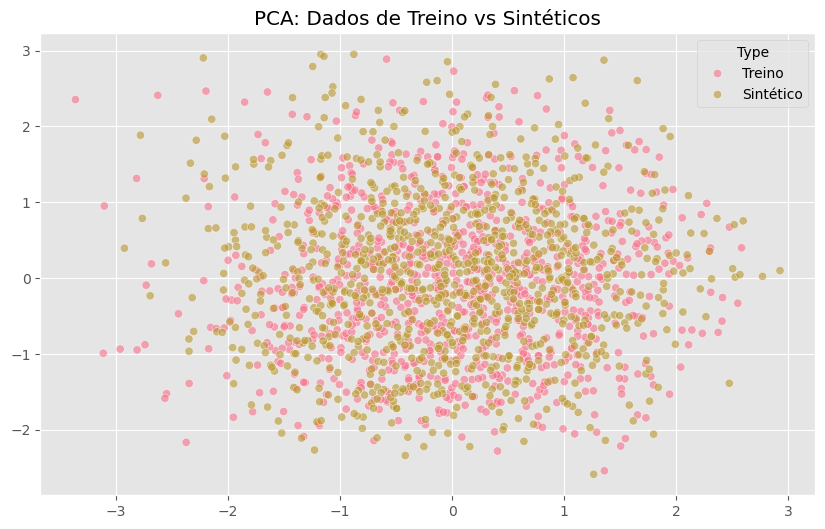

In [65]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(combined_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_results[:,0], y=pca_results[:,1], hue=combined['Type'], alpha=0.6)
plt.title('PCA: Dados de Treino vs Sintéticos')
plt.show()

A sobreposição parcial das nuvens de pontos demonstra que o modelo foi capaz de capturar a estrutura multivariada dos dados originais. Além disso, a similaridade na distribuição global sugere que os dados sintéticos preservam as relações entre as variáveis, mantendo as características estatísticas essenciais do conjunto real.

### 4. t-SNE

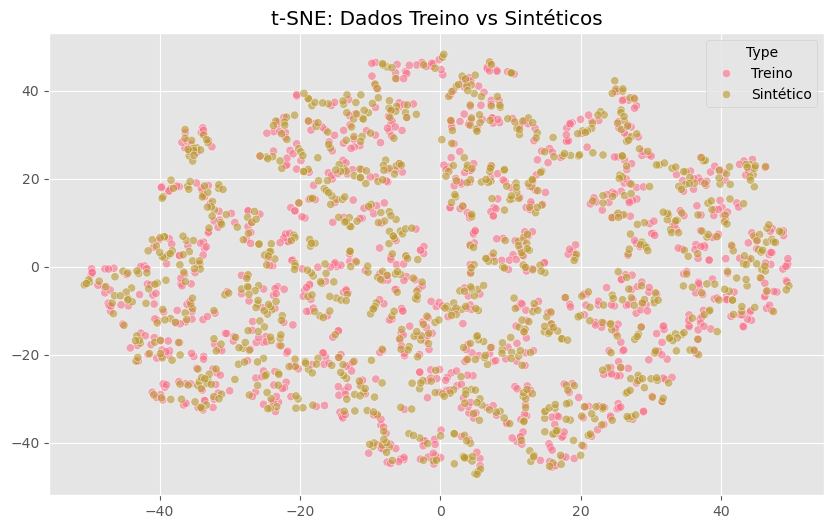

In [68]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(combined_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=combined['Type'], alpha=0.6)
plt.title('t-SNE: Dados Treino vs Sintéticos')
plt.show()

O gráfico t-SNE evidencia a preservação da estrutura dos dados originais, indicando que o CTGAN conseguiu capturar com sucesso as relações não-lineares entre as variáveis. A distribuição multivariada dos dados sintéticos foi replicada de forma convincente, reforçando a capacidade do modelo em manter a coerência estatística e estrutural do conjunto real.